In [57]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

In [58]:
train_path = "Dataset/train.csv"
df_train = pd.read_csv(train_path)
df_train

C:\Users\ARIF\AppData\Local\Temp\ipykernel_17728\3128072676.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [59]:
test_path = "Dataset/test.csv"
df_test= pd.read_csv(test_path)
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [60]:
df_train.columns # print all coumns of df_train

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Exploratory Data Analysis (EDA) & Feature Engineering

In [61]:
# Column Types

Categorical_columns =  ["Payment_Behaviour", "Payment_of_Min_Amount",
                        "Credit_History_Age", "Credit_Mix", "Type_of_Loan",
                        "Occupation", "Month", "Credit_Score"]

Numerical_columns = ["Age", "Annual_Income", "Monthly_Inhand_Salary",
                     "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
                     "Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment", "Changed_Credit_Limit",
                     "Num_Credit_Inquiries", "Outstanding_Debt",
                     "Credit_Utilization_Ratio", "Total_EMI_per_month",
                     "Amount_invested_monthly", "Monthly_Balance"]

Preprocessed_columns = []
Label_Encoded_columns = []
OneHot_Encoded_columns = []
column_replacement_dict={}

In [62]:
# Important feature engineering functions:

def Standardize_Column_Range(processed_column, grouping_column,
                             val_a, val_b,
                             df_train, df_test):

    # replace all rows outside the eligible range with NaNs
    df_train.loc[~df_train[processed_column].between(val_a, val_b), processed_column] = np.nan
    df_test.loc[~df_test[processed_column].between(val_a, val_b), processed_column] = np.nan

    # handle NaNs with group-based interpolation
    df_train[processed_column] = (
        df_train.groupby(grouping_column)[processed_column].transform(lambda x: x.interpolate(method="linear"))
    )
    df_test[processed_column] = (
        df_test.groupby(grouping_column)[processed_column].transform(lambda x: x.interpolate(method="linear"))
    )

    # handle remaining NaN rows in processed_column
    train_median = df_train[processed_column].median()
    df_train[processed_column] = df_train[processed_column].fillna(train_median)
    df_test[processed_column] = df_test[processed_column].fillna(train_median)

    # print status
    print(f"Pre-processed column: {processed_column}")
    return df_train, df_test


def Manual_Column_Mapping(map_dict, processed_column, df_train, df_test):
    df_train[processed_column] = df_train[processed_column].map(map_dict)
    df_test[processed_column] = df_test[processed_column].map(map_dict)

    # print status
    print(f"Pre-processed column: {processed_column}")
    return df_train, df_test


### 1. Check and Balance Target Class Distribution

In [63]:
y_train = df_train["Credit_Score"]
y_train.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [64]:
# handle y_train class imbalance:
min_count = y_train.value_counts().min()
df_balanced = (df_train.groupby("Credit_Score", group_keys=False).apply(lambda x: x.sample(min_count, random_state=42)))
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_balanced
df_train["Credit_Score"].value_counts()

C:\Users\ARIF\AppData\Local\Temp\ipykernel_17728\3822262314.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = (df_train.groupby("Credit_Score", group_keys=False).apply(lambda x: x.sample(min_count, random_state=42)))


Credit_Score
Standard    17828
Good        17828
Poor        17828
Name: count, dtype: int64

### 2. Extract numerical month information from "Credit_History_Age" by grouping based on "Customer_ID" colum and Linearly Interpolate for missing/NaN rows

In [65]:
processed_column = "Credit_History_Age"

def parse_age(s):
    if pd.isna(s):
        return np.nan
    match = re.match(r"(\d+)\s+Years\s+and\s+(\d+)\s+Months", s)
    if match:
        years, months = map(int, match.groups())
        return (years * 12 + months)/12
    return np.nan

# Linear interpolation
df_train[processed_column] = df_train[processed_column].apply(parse_age)
df_train[processed_column] = (df_train.groupby("Customer_ID")[processed_column].transform(lambda x: x.interpolate(method="linear"))
)

df_test[processed_column] = df_test[processed_column].apply(parse_age)
df_test[processed_column] = (df_test.groupby("Customer_ID")[processed_column].transform(lambda x: x.interpolate(method="linear"))
)

# Median NaN filling for remaining NaN rows
train_median_age = df_train[processed_column].median()
df_train[processed_column] = df_train[processed_column].fillna(train_median_age) # fill the remaining nans with the median

df_test[processed_column] = df_test[processed_column].fillna(train_median_age)# fill the remaining test nans with the train median (avoid data leakage)


Categorical_columns.remove(processed_column) # no longer a Categorical column
Numerical_columns.append(processed_column) # now a Numerical column
Preprocessed_columns.append(processed_column)

Categorical_columns_remain = Categorical_columns.copy()
Numerical_columns_remain = Numerical_columns.copy()

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)


print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns}")
print("+" * 50)


df_train[processed_column]

Pre-processed columns: ['Credit_History_Age']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Type_of_Loan', 'Occupation', 'Month', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        24.666667
1        25.000000
2        18.916667
3        18.916667
4        18.833333
           ...    
53479    23.666667
53480    16.916667
53481    11.916667
53482    16.333333
53483    30.416667
Name: Credit_History_Age, Length: 53484, dtype: float64

### 3. Extract "Month" column into integers (1-12) to obtain seasonality information


In [66]:
processed_column = "Month"

month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df_train, df_test = Manual_Column_Mapping(month_map, processed_column,
                                          df_train, df_test)

# df_train[processed_column] = df_train[processed_column].map(month_map)
# df_test[processed_column] = df_test[processed_column].map(month_map)

Categorical_columns.remove(processed_column)
Numerical_columns.append(processed_column)
Preprocessed_columns.append(processed_column) # define credit history age

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)


print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

df_train[processed_column]


Pre-processed column: Month
Pre-processed columns: ['Credit_History_Age', 'Month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Type_of_Loan', 'Occupation', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        4
1        8
2        2
3        5
4        8
        ..
53479    2
53480    3
53481    5
53482    6
53483    4
Name: Month, Length: 53484, dtype: int64

### 4. Non-NaN Categorical column string parsings and label encodings

In [67]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [68]:
Non_Nans = ["Payment_Behaviour", "Payment_of_Min_Amount", "Credit_Mix",
            "Occupation", "Credit_Score"]

for column in Non_Nans:
    print(df_train[column].value_counts())
    print("+" * 50)

Payment_Behaviour
Low_spent_Small_value_payments      13254
High_spent_Medium_value_payments     9420
High_spent_Large_value_payments      7509
Low_spent_Medium_value_payments      7486
High_spent_Small_value_payments      6125
Low_spent_Large_value_payments       5581
!@9#%8                               4109
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Payment_of_Min_Amount
Yes    24560
No     22412
NM      6512
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Credit_Mix
Good        17180
Standard    15718
_           10811
Bad          9775
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Occupation
_______          3676
Lawyer           3501
Engineer         3478
Accountant       3443
Architect        3394
Developer        3374
Mechanic         3351
Scientist        3347
Teacher          3331
Journalist       3318
Media_Manager    3309
Entrepreneur     3290
Doctor           3230
Manager         

### 4.A. Split "Payment_Behaviour" into 2 features

In [69]:
processed_column = "Payment_Behaviour"

replacement_columns = ["Spending_Level","Payment_Value"]

df_train[replacement_columns[0]] = df_train[processed_column].str.split("_").str[0]
df_train[replacement_columns[1]] = df_train[processed_column].str.split("_").str[2]

df_test[replacement_columns[0]] = df_test[processed_column].str.split("_").str[0]
df_test[replacement_columns[1]] = df_test[processed_column].str.split("_").str[2]

# Handle noise
df_train.loc[df_train[processed_column] == "!@9#%8", replacement_columns] = ["Unknown","Unknown"]

df_test.loc[df_test[processed_column] == "!@9#%8", replacement_columns] = ["Unknown","Unknown"]

df_train.drop(columns=processed_column, inplace=True)
df_test.drop(columns=processed_column, inplace=True)

Spending_Level_map = {"Unknown": 0, "Low": 1, "High": 2}
Payment_Value_map = {"Unknown": 0, "Small": 1, "Medium": 2, "Large": 3}

df_train, df_test = Manual_Column_Mapping(Spending_Level_map, replacement_columns[0],
                                          df_train, df_test)
df_train, df_test = Manual_Column_Mapping(Payment_Value_map, replacement_columns[1],
                                          df_train, df_test)


Categorical_columns.remove(processed_column)
Label_Encoded_columns.append(processed_column)
Preprocessed_columns.append(processed_column) # define credit history age

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

column_replacement_dict[processed_column] = replacement_columns

df_train[replacement_columns]

Pre-processed column: Spending_Level
Pre-processed column: Payment_Value
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Payment_of_Min_Amount', 'Credit_Mix', 'Type_of_Loan', 'Occupation', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


,Spending_Level,Payment_Value
0,0,0
1,2,2
2,1,1
3,1,2
4,2,2
...,...,...
53479,2,2
53480,2,2
53481,2,2
53482,1,1


### 4B. One Hot Encoding "Payment_of_Min_Amount"

In [70]:
processed_column = "Payment_of_Min_Amount"
fills = ["_No", "_Yes", "_NM"]
replacement_columns = []

for i in range(len(fills)):
    added_column = processed_column+fills[i]
    replacement_columns.append(added_column)


column_replacement_dict[processed_column] = replacement_columns

# One-hot Encoding
df_train = pd.get_dummies(df_train, columns=[processed_column], dtype=int)
df_test = pd.get_dummies(df_test, columns=[processed_column], dtype=int)

Categorical_columns.remove(processed_column)
Preprocessed_columns.append(processed_column) # define credit history age
OneHot_Encoded_columns.append(processed_column)

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

df_train

Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Credit_Mix', 'Type_of_Loan', 'Occupation', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0x1cc11,CUS_0xc8c,4,Tom Berging,23,103-20-7616,Journalist,14821.995,1064.166250,7,...,24.666667,25.619791,35.17645266579311,325.6203816273179,Standard,0,0,0,1,0
1,0x84b5,CUS_0x6c85,8,NaN,22,920-99-0917,Architect,72576.04,5934.003333,5,...,25.000000,197.009932,137.85586404285525,508.5345375387754,Good,2,2,0,1,0
2,0x21faf,CUS_0x815,2,Raymondh,14,307-66-3257,Developer,10445.48,656.456667,8,...,18.916667,56.976849,80.55596648685412,218.11285150574554,Poor,1,1,1,0,0
3,0x23e5a,CUS_0x78fe,5,Mirna Sleimann,31,574-49-3850,Journalist,44729.8,3728.483333,5,...,18.916667,0.000000,157.66148405705556,495.1868492762778,Standard,1,2,0,1,0
4,0x18265,CUS_0x3aa7,8,Shihara,26,774-43-5922,Writer,36825.11,2997.759167,5,...,18.833333,24.319836,47.866640448594865,477.5894404979113,Poor,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,0x748f,CUS_0x91ee,2,Douglasy,31,475-37-1012,Manager,59241.38,4818.781667,4,...,23.666667,128.929246,197.8750582305481,405.07386270821786,Good,2,2,0,1,0
53480,0x2cf0,CUS_0x5624,3,Zeidlerq,36,006-46-7211,Developer,39579.6,3206.300000,6,...,16.916667,127.940399,53.193151492541425,389.49644968472984,Standard,2,2,0,0,1
53481,0x1c0c6,CUS_0x91b,5,Soyoung Kimy,32,#F%$D@*&8,Developer,69073.65,5761.137500,6,...,11.916667,273.538497,85.03942586670252,467.53582672208313,Standard,2,2,1,0,0
53482,0x147ef,CUS_0x1dd9,6,NaN,-500,634-25-7796,Architect,35208.2,NaN,5,...,16.333333,44.730081,267.9520401693547,269.21954549526197,Good,1,1,0,1,0


### 4.C. Manual Mapping "Credit_Mix"

In [71]:
processed_column = "Credit_Mix"

Credit_Mix_map = {"_": 0, "Bad":-1, "Standard": 1, "Good": 2}

df_train, df_test = Manual_Column_Mapping(Credit_Mix_map, processed_column,
                                          df_train, df_test)

Categorical_columns.remove(processed_column)
Numerical_columns.append(processed_column)
Preprocessed_columns.append(processed_column) # define credit history age

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Credit_Mix
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Type_of_Loan', 'Occupation', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        1
1        2
2       -1
3        2
4        2
        ..
53479    2
53480    1
53481    1
53482    2
53483    2
Name: Credit_Mix, Length: 53484, dtype: int64

### 4.D. "Occupation" and "Credit_Score" Label Encoding

In [72]:
processed_column = "Occupation"
processed_target = "Credit_Score"

processed_columns = [processed_column, processed_target]

label_encoders = {}
for col in processed_columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

    if col != processed_target:
        df_test[col] = le.transform(df_test[col])

    Categorical_columns.remove(col)
    Label_Encoded_columns.append(col)
    Preprocessed_columns.append(col)

    if col in Categorical_columns_remain:
        Categorical_columns_remain.remove(col)

    if col in Numerical_columns_remain:
        Numerical_columns_remain.remove(col)


print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

df_train[processed_columns]

Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: ['Type_of_Loan']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


,Occupation,Credit_Score
0,6,2
1,1,0
2,2,1
3,6,2
4,14,1
...,...,...
53479,8,0
53480,2,2
53481,2,2
53482,1,0


### 5. "Type_of_Loan" column pre processing into integer of loan type numbers

In [73]:
processed_column = "Type_of_Loan"
df_train[processed_column].value_counts(dropna=False)

Type_of_Loan
NaN                                                                                                                       6532
Not Specified                                                                                                              776
Credit-Builder Loan                                                                                                        710
Personal Loan                                                                                                              697
Student Loan                                                                                                               686
                                                                                                                          ... 
Auto Loan, Mortgage Loan, Auto Loan, Mortgage Loan, Mortgage Loan, Auto Loan, and Not Specified                              1
Home Equity Loan, Personal Loan, Mortgage Loan, and Student Loan                                  

In [74]:
def loan_count(val):
    # cek NaN
    if pd.isna(val):
        return 0
    # cek string "Not Specified"
    if str(val).strip().lower() == "not specified":
        return 0
    # split by comma
    parts = [p.strip() for p in str(val).split(",")]
    return int(len(parts)) if parts else 0

df_train[processed_column] = df_train[processed_column].apply(loan_count)
df_test[processed_column] = df_test[processed_column].apply(loan_count)

Categorical_columns.remove(processed_column)
Numerical_columns.append(processed_column)
Preprocessed_columns.append(processed_column)

if processed_column in Categorical_columns_remain:
    Categorical_columns_remain.remove(processed_column)

if processed_column in Numerical_columns_remain:
    Numerical_columns_remain.remove(processed_column)


print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed categorical columns: {Categorical_columns_remain}")
print("+" * 50)
print(f"Remaining unprocessed numerical columns: {Numerical_columns_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed categorical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        3
1        4
2        7
3        0
4        1
        ..
53479    3
53480    6
53481    6
53482    2
53483    2
Name: Type_of_Loan, Length: 53484, dtype: int64

In [75]:
df_train[Numerical_columns_remain]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,14821.995,1064.166250,7,7,5770,3,13,19,0.7599999999999998,0.0,267.04,38.402005,25.619791,35.17645266579311,325.6203816273179
1,22,72576.04,5934.003333,5,3,7,4,5,14,2.27,1.0,478.74,39.252682,197.009932,137.85586404285525,508.5345375387754
2,14,10445.48,656.456667,8,10,32,7,28,23,8.2,8.0,1744.07,23.807832,56.976849,80.55596648685412,218.11285150574554
3,31,44729.8,3728.483333,5,4,6,0,12,9,2.82,0.0,512.83,37.112946,0.000000,157.66148405705556,495.1868492762778
4,26,36825.11,2997.759167,5,3,9,1,24,13,4.8599999999999985,4.0,520.36,31.044957,24.319836,47.866640448594865,477.5894404979113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,31,59241.38,4818.781667,4,5,9,3,7,10,6.0,2.0,690.12,40.403521,128.929246,197.8750582305481,405.07386270821786
53480,36,39579.6,3206.300000,6,5,10,6,19,13,17.69,5.0,634.77,35.400195,127.940399,53.193151492541425,389.49644968472984
53481,32,69073.65,5761.137500,6,7,7,6,22,13,16.31,10.0,509.41,38.303556,273.538497,85.03942586670252,467.53582672208313
53482,-500,35208.2,NaN,5,2,5,2,9,0,1.34,4.0,630.29,31.574495,44.730081,267.9520401693547,269.21954549526197


In [76]:
Numerical_Non_Nans_remain = ["Age", "Annual_Income", "Num_Bank_Accounts",
                      "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",
                      "Delay_from_due_date", "Changed_Credit_Limit",
                      "Outstanding_Debt", "Credit_Utilization_Ratio",
                      "Total_EMI_per_month"]

Numerical_Nans_remain = ["Monthly_Inhand_Salary", "Num_of_Delayed_Payment",
                         "Num_Credit_Inquiries", "Amount_invested_monthly",
                         "Monthly_Balance"]

### 6. Non-Nan Numerical Columns

In [77]:
for column in Numerical_Non_Nans_remain:
    mask = pd.to_numeric(df_train[column], errors="coerce").isna() & df_train[column].notna() # get rows with non Numerical and non naN values
    if mask.any():
        print(f"Column ' {column} ' has strings/invalid values:")
        print(df_train.loc[mask, column].unique())
        print("+" * 50)

Column ' Age ' has strings/invalid values:
['23_' '28_' '40_' '24_' '39_' '26_' '32_' '48_' '54_' '53_' '22_' '16_'
 '37_' '20_' '43_' '38_' '44_' '52_' '19_' '31_' '45_' '41_' '6921_' '29_'
 '55_' '14_' '33_' '34_' '15_' '25_' '27_' '35_' '18_' '21_' '47_' '36_'
 '50_' '46_' '30_' '51_' '17_' '733_' '1447_' '42_' '4301_' '3775_' '844_'
 '49_' '8523_' '6471_' '3578_' '56_' '2756_' '2155_' '5769_' '2846_'
 '6744_' '4445_' '7723_' '3988_' '7316_' '6381_' '6556_' '2329_' '6770_'
 '6799_' '2220_' '5589_' '3291_' '5798_' '1843_' '1102_' '8616_' '2111_'
 '2097_' '2474_' '6666_' '5109_' '4913_' '2159_' '7670_' '2463_' '2650_'
 '3339_']
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Annual_Income ' has strings/invalid values:
['59789.0_' '53709.66_' '12144.58_' ... '159560.76_' '142544.36_'
 '31700.3_']
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Num_of_Loan ' has strings/invalid values:
['6_' '3_' '8_' '7_' '2_' '5_' '0_' '1_' '4_' '9_' '1185_' '131_' '1171_'
 '14

### 6.A. Handle '_' containing strings

In [78]:
for column in Numerical_Non_Nans_remain:
    # delete "_" from each strings
    df_train[column] = df_train[column].astype(str).str.replace("_", "", regex=False)
    df_test[column] = df_test[column].astype(str).str.replace("_", "", regex=False)

    df_train[column] = pd.to_numeric(df_train[column], errors="coerce")
    df_test[column] = pd.to_numeric(df_test[column], errors="coerce")

    print(f"Number of NaNs in column '{column}': {df_train[column].isna().sum()}")

    mask = df_train[column].apply(lambda x: isinstance(x, str))
    print(f"Number of strings in column '{column}': {mask.sum()}")


Number of NaNs in column 'Age': 0
Number of strings in column 'Age': 0
Number of NaNs in column 'Annual_Income': 0
Number of strings in column 'Annual_Income': 0
Number of NaNs in column 'Num_Bank_Accounts': 0
Number of strings in column 'Num_Bank_Accounts': 0
Number of NaNs in column 'Num_Credit_Card': 0
Number of strings in column 'Num_Credit_Card': 0
Number of NaNs in column 'Interest_Rate': 0
Number of strings in column 'Interest_Rate': 0
Number of NaNs in column 'Num_of_Loan': 0
Number of strings in column 'Num_of_Loan': 0
Number of NaNs in column 'Delay_from_due_date': 0
Number of strings in column 'Delay_from_due_date': 0
Number of NaNs in column 'Changed_Credit_Limit': 1146
Number of strings in column 'Changed_Credit_Limit': 0
Number of NaNs in column 'Outstanding_Debt': 0
Number of strings in column 'Outstanding_Debt': 0
Number of NaNs in column 'Credit_Utilization_Ratio': 0
Number of strings in column 'Credit_Utilization_Ratio': 0
Number of NaNs in column 'Total_EMI_per_month

In [79]:
Numerical_Non_Nans_remain.remove("Changed_Credit_Limit")
Numerical_Nans_remain.append("Changed_Credit_Limit")

print(f"Remaining Non-NaN numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining NaN numerical columns: {Numerical_Nans_remain}")

Remaining Non-NaN numerical columns: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']


### 6.B. Handle invalid age integers

In [80]:
processed_column = "Age"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             18, 80,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Age
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        23.0
1        22.0
2        34.0
3        31.0
4        26.0
         ... 
53479    31.0
53480    36.0
53481    32.0
53482    45.0
53483    46.0
Name: Age, Length: 53484, dtype: float64

### 6.C. Handle Invalid Integers in "Num_Bank_Account"

In [81]:
processed_column = "Num_Bank_Accounts"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             1, 10,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Num_Bank_Accounts
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        7.0
1        5.0
2        8.0
3        5.0
4        5.0
        ... 
53479    4.0
53480    6.0
53481    6.0
53482    5.0
53483    1.0
Name: Num_Bank_Accounts, Length: 53484, dtype: float64

### 6.D. Handle Invalid Integers in "Num_Credit_Card"

In [82]:
processed_column = "Num_Credit_Card"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             0, 10,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Num_Credit_Card
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0         7.0
1         3.0
2        10.0
3         4.0
4         3.0
         ... 
53479     5.0
53480     5.0
53481     7.0
53482     2.0
53483     7.0
Name: Num_Credit_Card, Length: 53484, dtype: float64

### 6.E. Handle Invalids in "Interest_Rate"

In [83]:
processed_column = "Interest_Rate"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             10, 30,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Interest_Rate
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        17.0
1        17.0
2        17.0
3        17.0
4        17.0
         ... 
53479    17.0
53480    10.0
53481    17.0
53482    17.0
53483    17.0
Name: Interest_Rate, Length: 53484, dtype: float64

### 6.F. Handle Invalids in "Num_of_Loan"

In [84]:
processed_column = "Num_of_Loan"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             0, 10,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Num_of_Loan
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        3.0
1        4.0
2        7.0
3        0.0
4        1.0
        ... 
53479    3.0
53480    6.0
53481    6.0
53482    2.0
53483    2.0
Name: Num_of_Loan, Length: 53484, dtype: float64

### 6.G. Handle Invalids in "Delay_from_due_date"

In [85]:
processed_column = "Delay_from_due_date"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             0, 30,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Delay_from_due_date
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        13.0
1         5.0
2        28.0
3        12.0
4        24.0
         ... 
53479     7.0
53480    19.0
53481    22.0
53482     9.0
53483     8.0
Name: Delay_from_due_date, Length: 53484, dtype: float64

### 6.H. Handle Invalids in "Total_EMI_per_month"

In [86]:
processed_column = "Total_EMI_per_month"

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             0, 10000,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)

if processed_column in Numerical_Non_Nans_remain:
    Numerical_Non_Nans_remain.remove(processed_column)

if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

Preprocessed_columns = Preprocessed_columns + Numerical_Non_Nans_remain
Numerical_Non_Nans_remain=[] # all  remaining Non-NaN columns are considered valid

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Total_EMI_per_month
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0         25.619791
1        197.009932
2         56.976849
3          0.000000
4         24.319836
            ...    
53479    128.929246
53480    127.940399
53481    273.538497
53482     44.730081
53483     58.315638
Name: Total_EMI_per_month, Length: 53484, dtype: float64

### 7. NaN Numerical Columns

In [87]:
df_train[Numerical_Nans_remain]

,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance,Changed_Credit_Limit
0,1064.166250,19,0.0,35.17645266579311,325.6203816273179,0.76
1,5934.003333,14,1.0,137.85586404285525,508.5345375387754,2.27
2,656.456667,23,8.0,80.55596648685412,218.11285150574554,8.20
3,3728.483333,9,0.0,157.66148405705556,495.1868492762778,2.82
4,2997.759167,13,4.0,47.866640448594865,477.5894404979113,4.86
...,...,...,...,...,...,...
53479,4818.781667,10,2.0,197.8750582305481,405.07386270821786,6.00
53480,3206.300000,13,5.0,53.193151492541425,389.49644968472984,17.69
53481,5761.137500,13,10.0,85.03942586670252,467.53582672208313,16.31
53482,NaN,0,4.0,267.9520401693547,269.21954549526197,1.34


In [88]:
for column in Numerical_Nans_remain:
    mask = pd.to_numeric(df_train[column], errors="coerce").isna()
    if mask.any():
        print(f"Column ' {column} ' has strings/invalid values:")
        print(df_train.loc[mask, column].unique())
        print("+" * 50)

Column ' Monthly_Inhand_Salary ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Num_of_Delayed_Payment ' has strings/invalid values:
[nan '12_' '3_' '17_' '4_' '24_' '23_' '10_' '11_' '8_' '14_' '9_' '18_'
 '15_' '19_' '13_' '20_' '25_' '7_' '27_' '22_' '5_' '16_' '1_' '6_' '0_'
 '-2_' '2_' '21_' '3840_' '-1_' '-3_' '26_' '758_' '2794_' '2142_' '2569_'
 '1473_' '28_' '1295_']
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Num_Credit_Inquiries ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Amount_invested_monthly ' has strings/invalid values:
['__10000__' nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Monthly_Balance ' has strings/invalid values:
[nan '__-333333333333333333333333333__']
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Changed_Credit_Limit ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++


### 7.A. Handle the "_" Containing Strings

In [89]:
for column in Numerical_Nans_remain:
    # delete "_" from each strings
    df_train[column] = df_train[column].astype(str).str.replace("_", "", regex=False)
    df_test[column] = df_test[column].astype(str).str.replace("_", "", regex=False)

    df_train[column] = pd.to_numeric(df_train[column], errors="coerce")
    df_test[column] = pd.to_numeric(df_test[column], errors="coerce")

    print(f"Number of NaNs in column '{column}': {df_train[column].isna().sum()}")

    mask = df_train[column].apply(lambda x: isinstance(x, str))
    print(f"Number of strings in column '{column}': {mask.sum()}")


Number of NaNs in column 'Monthly_Inhand_Salary': 8183
Number of strings in column 'Monthly_Inhand_Salary': 0
Number of NaNs in column 'Num_of_Delayed_Payment': 3788
Number of strings in column 'Num_of_Delayed_Payment': 0
Number of NaNs in column 'Num_Credit_Inquiries': 1032
Number of strings in column 'Num_Credit_Inquiries': 0
Number of NaNs in column 'Amount_invested_monthly': 2438
Number of strings in column 'Amount_invested_monthly': 0
Number of NaNs in column 'Monthly_Balance': 682
Number of strings in column 'Monthly_Balance': 0
Number of NaNs in column 'Changed_Credit_Limit': 1146
Number of strings in column 'Changed_Credit_Limit': 0


In [90]:
for column in Numerical_Nans_remain:
    mask = pd.to_numeric(df_train[column], errors="coerce").isna()
    if mask.any():
        print(f"Column ' {column} ' has strings/invalid values:")
        print(df_train.loc[mask, column].unique())
        print("+" * 50)

df_train[Numerical_Nans_remain]

Column ' Monthly_Inhand_Salary ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Num_of_Delayed_Payment ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Num_Credit_Inquiries ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Amount_invested_monthly ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Monthly_Balance ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++
Column ' Changed_Credit_Limit ' has strings/invalid values:
[nan]
++++++++++++++++++++++++++++++++++++++++++++++++++


,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance,Changed_Credit_Limit
0,1064.166250,19.0,0.0,35.176453,325.620382,0.76
1,5934.003333,14.0,1.0,137.855864,508.534538,2.27
2,656.456667,23.0,8.0,80.555966,218.112852,8.20
3,3728.483333,9.0,0.0,157.661484,495.186849,2.82
4,2997.759167,13.0,4.0,47.866640,477.589440,4.86
...,...,...,...,...,...,...
53479,4818.781667,10.0,2.0,197.875058,405.073863,6.00
53480,3206.300000,13.0,5.0,53.193151,389.496450,17.69
53481,5761.137500,13.0,10.0,85.039426,467.535827,16.31
53482,NaN,0.0,4.0,267.952040,269.219545,1.34


### 7.B. Handle NaNs in "Monthly_Inhand_Salary"

In [91]:
processed_column = "Monthly_Inhand_Salary"
val_a = df_train[processed_column].min()
val_b = df_train[processed_column].max()

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Monthly_Inhand_Salary
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        1064.166250
1        5934.003333
2         656.456667
3        3728.483333
4        2997.759167
            ...     
53479    4818.781667
53480    3206.300000
53481    5761.137500
53482    2919.016667
53483    5315.613333
Name: Monthly_Inhand_Salary, Length: 53484, dtype: float64

### 7.C. Handle NaNs in "Num_of_Delayed_Payment"

In [92]:
processed_column = "Num_of_Delayed_Payment"
val_a = 0
val_b = 10

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Num_of_Delayed_Payment
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0         7.0
1         7.0
2         7.0
3         9.0
4         7.0
         ... 
53479    10.0
53480     7.0
53481    10.0
53482     0.0
53483     3.0
Name: Num_of_Delayed_Payment, Length: 53484, dtype: float64

### 7.D. Handle NaNs in "Num_Credit_Inquiries"

In [93]:
processed_column = "Num_Credit_Inquiries"
val_a = 0
val_b = 5

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Num_Credit_Inquiries
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        0.0
1        1.0
2        3.0
3        0.0
4        4.0
        ... 
53479    2.0
53480    5.0
53481    3.0
53482    4.0
53483    5.0
Name: Num_Credit_Inquiries, Length: 53484, dtype: float64

### 7.E. Handle NaNs in "Amount_invested_monthly"

In [94]:
processed_column = "Amount_invested_monthly"
val_a = df_train[processed_column].min()
val_b = df_train[processed_column].max()

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Amount_invested_monthly
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0         35.176453
1        137.855864
2         80.555966
3        157.661484
4         47.866640
            ...    
53479    197.875058
53480     53.193151
53481     85.039426
53482    267.952040
53483    330.405684
Name: Amount_invested_monthly, Length: 53484, dtype: float64

### 7.F. Handle NaNs in "Monthly_Balance"

In [95]:
processed_column = "Monthly_Balance"
val_a = 0
val_b = df_train[processed_column].max()

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Monthly_Balance
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: ['Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++


0        325.620382
1        508.534538
2        218.112852
3        495.186849
4        477.589440
            ...    
53479    405.073863
53480    389.496450
53481    467.535827
53482    269.219545
53483    402.840011
Name: Monthly_Balance, Length: 53484, dtype: float64

### 7.G. Handle NaNs in "Changed_Credit_Limit"

In [96]:
processed_column = "Changed_Credit_Limit"
val_a = 0
val_b = 50

df_train, df_test = Standardize_Column_Range(processed_column, "Customer_ID",
                                             val_a, val_b,
                                             df_train, df_test)

Preprocessed_columns.append(processed_column)


if processed_column in Numerical_Nans_remain:
    Numerical_Nans_remain.remove(processed_column)

print(f"Pre-processed columns: {Preprocessed_columns}")
print("+" * 50)
print(f"Remaining unprocessed Non-NaN Numerical columns: {Numerical_Non_Nans_remain}")
print("+" * 50)
print(f"Remaining unprocessed NaN numerical columns: {Numerical_Nans_remain}")
print("+" * 50)

df_train[processed_column]

Pre-processed column: Changed_Credit_Limit
Pre-processed columns: ['Credit_History_Age', 'Month', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation', 'Credit_Score', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed Non-NaN Numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++
Remaining unprocessed NaN numerical columns: []
++++++++++++++++++++++++++++++++++++++++++++++++++


0         0.76
1         2.27
2         8.20
3         2.82
4         4.86
         ...  
53479     6.00
53480    17.69
53481    16.31
53482     1.34
53483     5.15
Name: Changed_Credit_Limit, Length: 53484, dtype: float64

In [97]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0x1cc11,CUS_0xc8c,4,Tom Berging,23.0,103-20-7616,6,14821.995,1064.166250,7.0,...,24.666667,25.619791,35.176453,325.620382,2,0,0,0,1,0
1,0x84b5,CUS_0x6c85,8,NaN,22.0,920-99-0917,1,72576.040,5934.003333,5.0,...,25.000000,197.009932,137.855864,508.534538,0,2,2,0,1,0
2,0x21faf,CUS_0x815,2,Raymondh,34.0,307-66-3257,2,10445.480,656.456667,8.0,...,18.916667,56.976849,80.555966,218.112852,1,1,1,1,0,0
3,0x23e5a,CUS_0x78fe,5,Mirna Sleimann,31.0,574-49-3850,6,44729.800,3728.483333,5.0,...,18.916667,0.000000,157.661484,495.186849,2,1,2,0,1,0
4,0x18265,CUS_0x3aa7,8,Shihara,26.0,774-43-5922,14,36825.110,2997.759167,5.0,...,18.833333,24.319836,47.866640,477.589440,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,0x748f,CUS_0x91ee,2,Douglasy,31.0,475-37-1012,8,59241.380,4818.781667,4.0,...,23.666667,128.929246,197.875058,405.073863,0,2,2,0,1,0
53480,0x2cf0,CUS_0x5624,3,Zeidlerq,36.0,006-46-7211,2,39579.600,3206.300000,6.0,...,16.916667,127.940399,53.193151,389.496450,2,2,2,0,0,1
53481,0x1c0c6,CUS_0x91b,5,Soyoung Kimy,32.0,#F%$D@*&8,2,69073.650,5761.137500,6.0,...,11.916667,273.538497,85.039426,467.535827,2,2,2,1,0,0
53482,0x147ef,CUS_0x1dd9,6,NaN,45.0,634-25-7796,1,35208.200,2919.016667,5.0,...,16.333333,44.730081,267.952040,269.219545,0,1,1,0,1,0


In [98]:
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spending_Level,Payment_Value,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3.0,...,35.030402,22.750000,49.574949,236.642682,186.266702,1,1,0,1,0
1,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,12,19114.12,1824.843333,3.0,...,33.053114,22.833333,49.574949,21.465380,361.444004,2,2,0,1,0
2,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,12,19114.12,1824.843333,3.0,...,33.811894,22.916667,49.574949,148.233938,264.675446,1,2,0,1,0
3,0x160d,CUS_0xd40,12,Aaron Maashoh,24.0,821-00-0265,12,19114.12,1824.843333,3.0,...,32.430559,23.000000,49.574949,39.082511,343.826873,2,2,0,1,0
4,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,15,34847.84,3037.986667,2.0,...,25.926822,27.250000,18.816215,39.684018,485.298434,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,12,Sarah McBridec,29.0,031-35-0942,1,20002.88,1929.906667,10.0,...,34.780553,6.500000,60.964772,146.486325,275.539570,1,1,0,0,1
49996,0x25fee,CUS_0x942c,9,Nicks,25.0,078-73-5990,9,39628.99,3197.027904,4.0,...,27.758522,31.916667,35.104023,181.442999,409.394562,1,1,1,0,0
49997,0x25fef,CUS_0x942c,10,Nicks,25.0,078-73-5990,9,39628.99,3359.415833,4.0,...,36.858542,32.000000,35.104023,10000.000000,349.726332,1,3,0,1,0
49998,0x25ff0,CUS_0x942c,11,Nicks,25.0,078-73-5990,9,39628.99,3359.415833,4.0,...,39.139840,32.083333,35.104023,97.598580,463.238981,2,1,0,1,0


In [99]:
target_column = "Credit_Score"
feature_columns = Preprocessed_columns.copy()
feature_columns.remove(target_column)
for column in Preprocessed_columns:
    if column in column_replacement_dict:
        feature_columns.remove(column)
        feature_columns = feature_columns + column_replacement_dict[column]

df_train_features = df_train[feature_columns]
df_train_target = df_train[target_column]
df_test_features = df_test[feature_columns]


for column in Label_Encoded_columns:
    if column in column_replacement_dict:
        Label_Encoded_columns.remove(column)
        Label_Encoded_columns = Label_Encoded_columns + column_replacement_dict[column]

for column in OneHot_Encoded_columns:
    if column in column_replacement_dict:
        OneHot_Encoded_columns.remove(column)
        OneHot_Encoded_columns = OneHot_Encoded_columns + column_replacement_dict[column]

print(f"trainable features: {feature_columns}")
print("+" * 50)
print(f"OneHot Encoded columns: {OneHot_Encoded_columns}")
print("+" * 50)
print(f"Label Encoded columns: {Label_Encoded_columns}")

df_train_features

trainable features: ['Credit_History_Age', 'Month', 'Credit_Mix', 'Occupation', 'Type_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit', 'Spending_Level', 'Payment_Value', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_NM']
++++++++++++++++++++++++++++++++++++++++++++++++++
OneHot Encoded columns: ['Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_NM']
++++++++++++++++++++++++++++++++++++++++++++++++++
Label Encoded columns: ['Occupation', 'Credit_Score', 'Spending_Level', 'Payment_Value']


,Credit_History_Age,Month,Credit_Mix,Occupation,Type_of_Loan,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_of_Delayed_Payment,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance,Changed_Credit_Limit,Spending_Level,Payment_Value,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_NM
0,24.666667,4,1,6,3,23.0,7.0,7.0,17.0,3.0,...,7.0,0.0,35.176453,325.620382,0.76,0,0,1,0,0
1,25.000000,8,2,1,4,22.0,5.0,3.0,17.0,4.0,...,7.0,1.0,137.855864,508.534538,2.27,2,2,1,0,0
2,18.916667,2,-1,2,7,34.0,8.0,10.0,17.0,7.0,...,7.0,3.0,80.555966,218.112852,8.20,1,1,0,0,1
3,18.916667,5,2,6,0,31.0,5.0,4.0,17.0,0.0,...,9.0,0.0,157.661484,495.186849,2.82,1,2,1,0,0
4,18.833333,8,2,14,1,26.0,5.0,3.0,17.0,1.0,...,7.0,4.0,47.866640,477.589440,4.86,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,23.666667,2,2,8,3,31.0,4.0,5.0,17.0,3.0,...,10.0,2.0,197.875058,405.073863,6.00,2,2,1,0,0
53480,16.916667,3,1,2,6,36.0,6.0,5.0,10.0,6.0,...,7.0,5.0,53.193151,389.496450,17.69,2,2,0,1,0
53481,11.916667,5,1,2,6,32.0,6.0,7.0,17.0,6.0,...,10.0,3.0,85.039426,467.535827,16.31,2,2,0,0,1
53482,16.333333,6,2,1,2,45.0,5.0,2.0,17.0,2.0,...,0.0,4.0,267.952040,269.219545,1.34,1,1,1,0,0


### 8. Standard Scaling Numerical columns

In [100]:

df_train_features = df_train_features.copy()
df_test_features = df_test_features.copy()


numerical_cols = [col for col in df_train_features.columns if col not in OneHot_Encoded_columns + Label_Encoded_columns]

# scale only the numerical columns
scaler = StandardScaler()
df_train_features.loc[:, numerical_cols] = scaler.fit_transform(df_train_features[numerical_cols])

df_test_features.loc[:, numerical_cols] = scaler.transform(df_test_features[numerical_cols])


C:\Users\ARIF\AppData\Local\Temp\ipykernel_17728\4219063000.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.23642452  1.51367809 -1.11147582 ...  0.20110114  0.63862679
 -0.23642452]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train_features.loc[:, numerical_cols] = scaler.fit_transform(df_train_features[numerical_cols])
C:\Users\ARIF\AppData\Local\Temp\ipykernel_17728\4219063000.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.22556994  1.14085578 -1.60500174 ...  0.22556994  1.14085578
  1.14085578]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train_features.loc[:, numerical_cols] = scaler.fit_transform(df_train_features[numerical_cols])
C:\Users\ARIF\AppData\Local\Temp\ipykernel_17728\4219063000.py:9: FutureWarning: Setting an item

### 9. Correlation Matrix

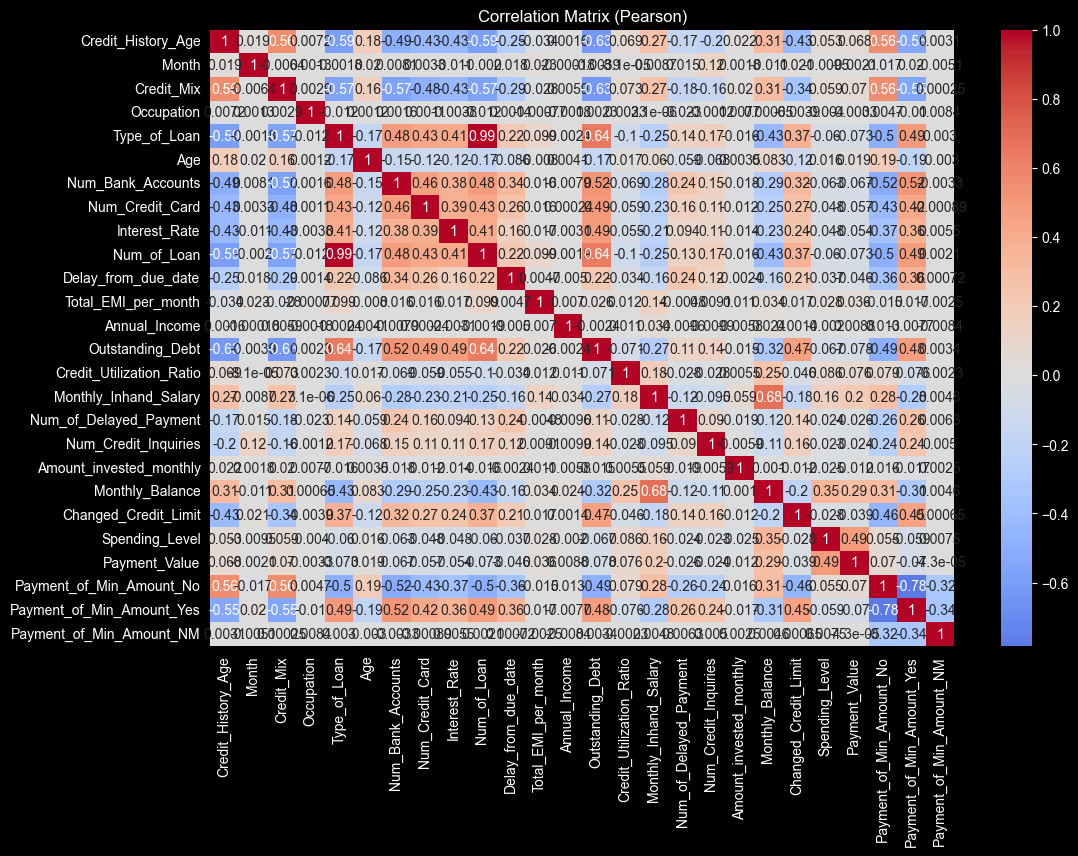

Features with correlation < 0.5 with all others:
['Month', 'Occupation', 'Age', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Total_EMI_per_month', 'Annual_Income', 'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Changed_Credit_Limit', 'Spending_Level', 'Payment_Value', 'Payment_of_Min_Amount_NM']


In [101]:
corr_matrix = df_train_features.corr(method="pearson")

# heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Pearson)")
plt.show()

threshold = 0.5
# features with correlation coefficients < threshold
low_corr_features = []
for col in corr_matrix.columns:
    max_corr = corr_matrix[col].drop(col).abs().max()
    if max_corr < threshold:
        low_corr_features.append(col)

print(f"Features with correlation < {threshold} with all others:")
print(low_corr_features)


### 10. Feature Selection based on Gini Importance

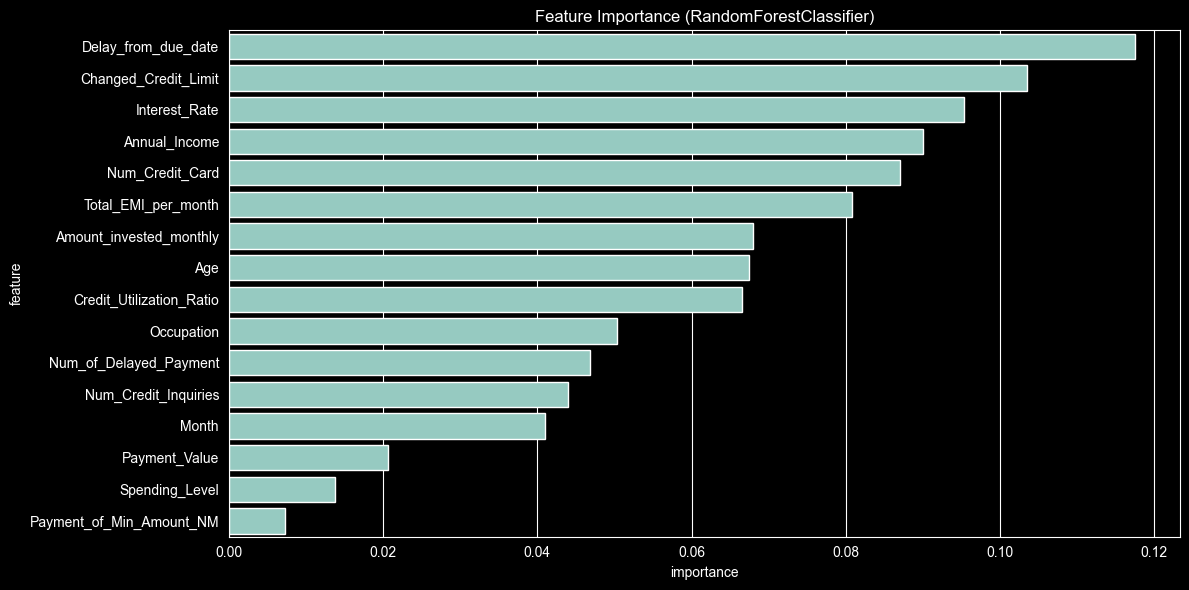

In [102]:
df_train_features = df_train_features[low_corr_features].copy()
X_train = df_train_features
y_train = df_train_target


# 1. Train RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 2. Get all the feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# 3. feature importance dataframe
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

#4. take features with importances > Threshold
Threshold = 0.04
Saved_features = []
for i in range(len(feat_imp)):
    if feat_imp["importance"][i] > Threshold:
        Saved_features.append(feat_imp["feature"][i])

saved_train_features = Saved_features.copy()
saved_test_features = Saved_features.copy()
saved_train_features.append(target_column)

df_train[saved_train_features].to_csv("Dataset/preprocessed_train dataset.csv", index=False)

df_test[saved_test_features].to_csv("Dataset/preprocessed_test dataset.csv", index=False)


# 5. Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="importance", y="feature", data=feat_imp)
plt.title("Feature Importance (RandomForestClassifier)")
plt.tight_layout()
plt.show()


### 11. Save artifacts

In [103]:
joblib.dump(Label_Encoded_columns, "Label_Encoded_columns.pkl")
joblib.dump(OneHot_Encoded_columns, "OneHot_Encoded_columns.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['standard_scaler.pkl']